## Setup

In [1]:
import transformer_functions as tf

import importlib
import getpass
import urllib.parse
import psycopg2

import datetime
import pytz
import calendar

from math import floor, ceil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()

In [2]:
print('\nEDM login information')

edm_address = getpass.getpass(prompt='EDM server address: ')
edm_name = getpass.getpass(prompt='Username: ')
edm_password = getpass.getpass(prompt='Password: ')
#edm_password = urllib.parse.quote(edm_password)


add = urllib.parse.urlparse(f'postgresql://{edm_name}:{edm_password}@{edm_address}/edm')

conn = psycopg2.connect(host = add.hostname, 
                        database = add.path[1:], 
                        password = add.password, 
                        user = add.username)

# Delete the credential variables for security purpose.
del edm_name, edm_password, add


EDM login information
Username: ········
Password: ········


In [3]:
importlib.reload(tf);

In [4]:
ts = [tf.transformer(grid = 'awefice', id = 'transformer_92', capacity_budget = 0.9)]
ts.append(tf.transformer(grid = 'awefice', id = 'transformer_43', capacity_budget = 0.5))
ts.append(tf.transformer(grid = 'awefice', id = 'transformer_26', capacity_budget = 0.5))

for t in ts:
    t.retrieve_data(conn)

In [5]:
t2 = tf.transformer(grid = 'awefice', id = 'transformer_63', capacity_budget = 0.7)
t2.retrieve_data(conn)

In [6]:
charger = tf.charger(15,120)
chargers = [(tf.charger(7,120), 0.2), (tf.charger(20,120), 0.5), (tf.charger(110, 120),0.3)]
chargers2 = [(tf.charger(7,120),0.5), (tf.charger(70,120),0.5)]

## How many chargers can we fit?


Scenario: a business owns the parking lot in the middle of the image below and wants to install some chargers.

<c>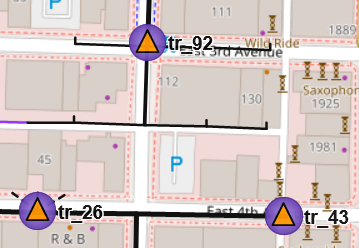</c>

On which transformer(s) they install chargers? How many can they install?

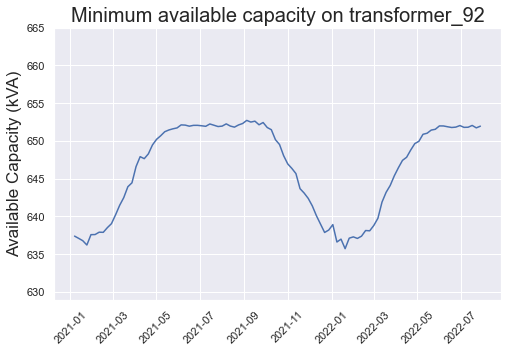

In [7]:
ts[0].graph_excess_capacity('2021-01-01', '2022-07-28', aggregator = 'min', bins = 100, figheight = 5, figwidth = 8)

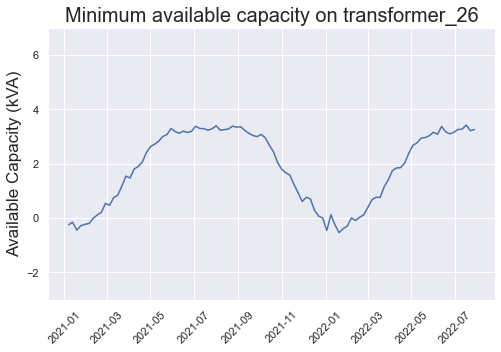

In [8]:
ts[2].graph_excess_capacity('2021-01-01', '2022-07-28', aggregator = 'min', bins = 100, figheight = 5, figwidth = 8)

We can see that transformer 92 has a lot more available capacity compared to transformer 26.

Power consumption varies with time, both monthly and hourly.

In [ ]:
ts[0].graph_capacity_monthly()

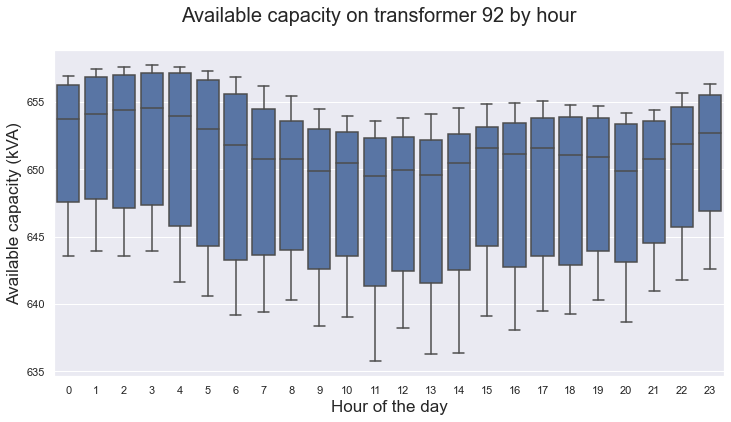

In [9]:
ts[0].graph_capacity_hourly()

Solution needs to account for this!

### One type of charger

The business wants to install some 15 kW chargers in the lot. How many can they install?

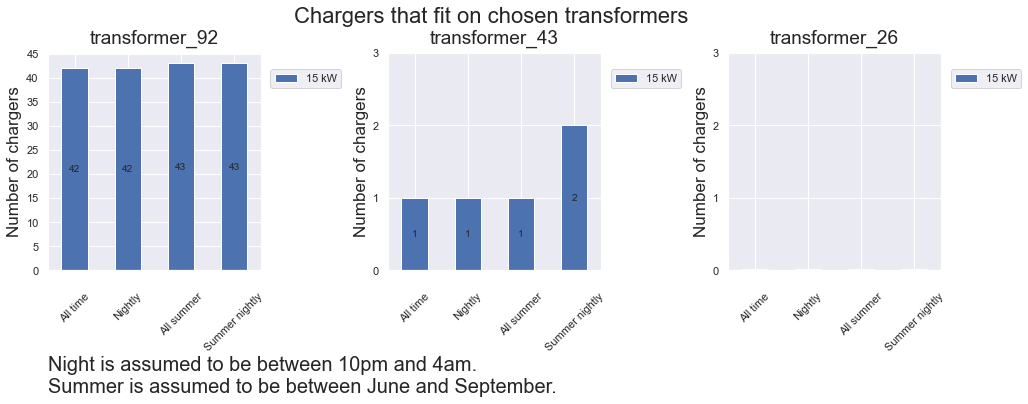

In [10]:
tf.graph_chargers_on(ts, [charger])

- Transformer 26? 0!
- Transformer 43? 1-2.
- Transformer 92? Quite a lot more.

### Multiple types of chargers

Another situation that can come up is this: we want to install a variety of charger types at one location.

Example:
- 7 kW
- 20 kW
- 110 kW

How many can we install, and in what proportions?

### Fixed proportions of chargers

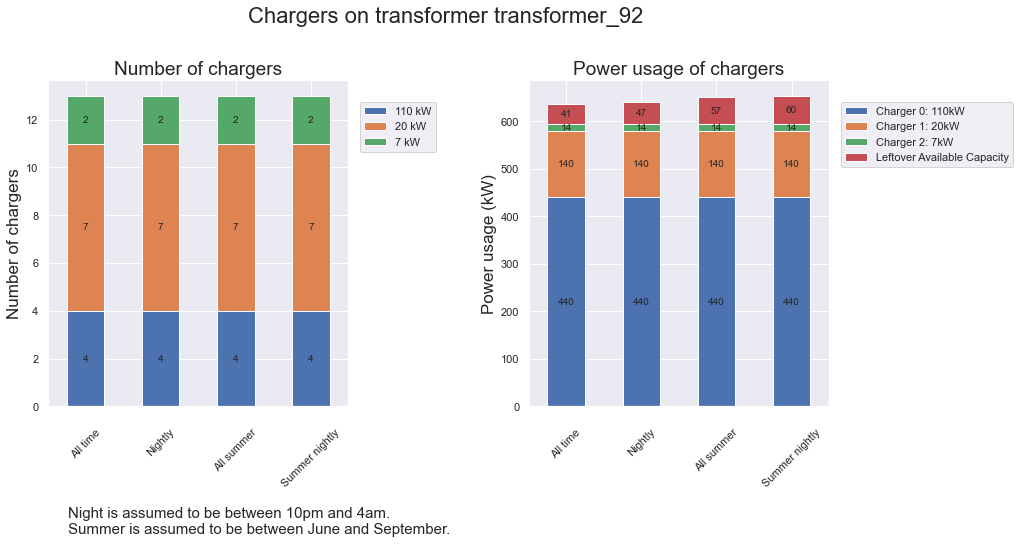

In [11]:
ts[0].graph_power_scenarios(chargers, prop = 'num')

### Recommendation

Assumption: the business wants to balance number of chargers accross the types.

Recommend:
- 4 of the 110kW charger
- 7 of the 20 kW chargers
- 2 of the 7kW chargers.

### Dynamic Analysis

The analysis above was not hard coded to those specific charger types and transformers.

User input:
- charger information
- transformers to look at

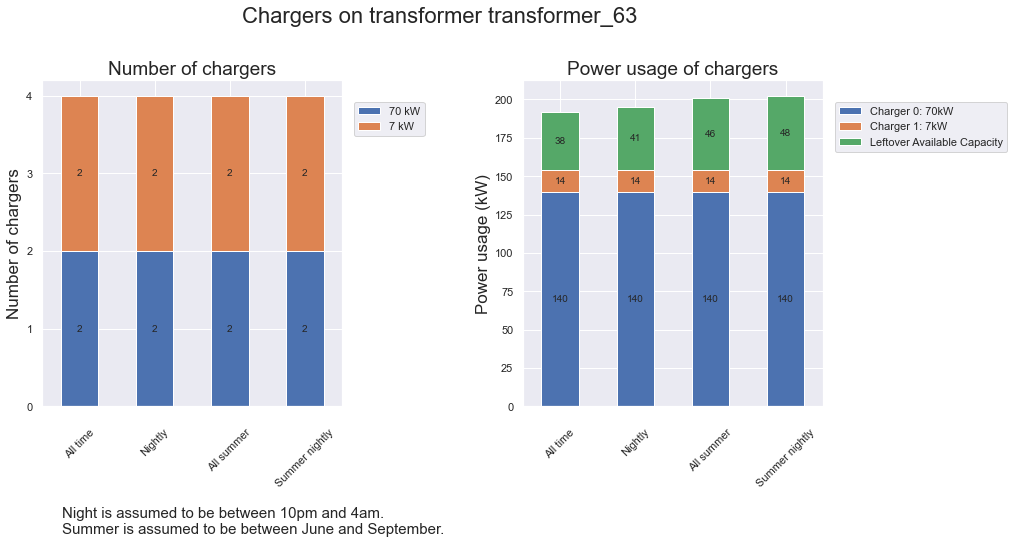

In [12]:
t2.graph_power_scenarios(chargers2, prop = 'num')

Recommend: two of each